In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, GRU
from tensorflow.keras.layers import MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.layers import Activation, BatchNormalization

from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Data Load

In [ ]:
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/ML programming/data/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/ML programming/data/UCI HAR Dataset/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-2236244950.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-2236244950.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-2236244950.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-2236244950.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


/tmp/ipython-input-2236244950.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-2236244950.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

## Data Scaling

## Simple CNN

In [ ]:
cnn_model = Sequential()

cnn_model.add(Input(shape=(n_timesteps, n_features)))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))


cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(n_outputs, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 126, 64)        │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │       384,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,202 (1.57 MB)

 Trainable params: 411,202 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_history=cnn_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_249
Received: inputs=('Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))')
  warnings.warn(msg)


166/166 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6245 - loss: 0.9302 - val_accuracy: 0.8998 - val_loss: 0.2421
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9280 - loss: 0.2120 - val_accuracy: 0.9389 - val_loss: 0.1391
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9418 - loss: 0.1648 - val_accuracy: 0.9457 - val_loss: 0.1198
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9509 - loss: 0.1236 - val_accuracy: 0.9525 - val_loss: 0.0969
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9472 - loss: 0.1310 - val_accuracy: 0.9525 - val_loss: 0.0991
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9479 - loss: 0.1190 - val_accuracy: 0.9474 - val_loss: 0.0944
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9515 - loss: 0.1294 - val_accuracy: 0.9576 - val_loss: 0.0924
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9472 - loss: 0.1195 - val_accuracy: 0.9525 - val

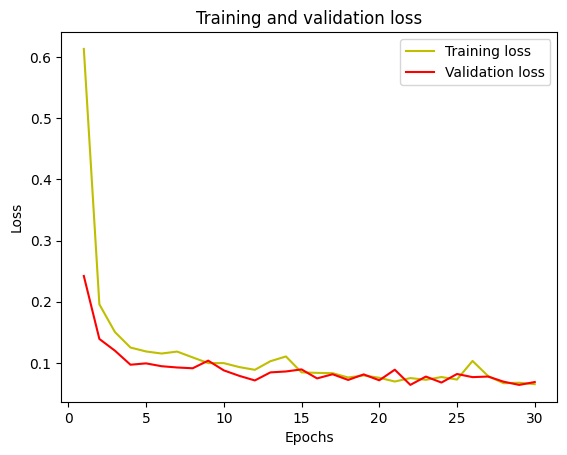

In [ ]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


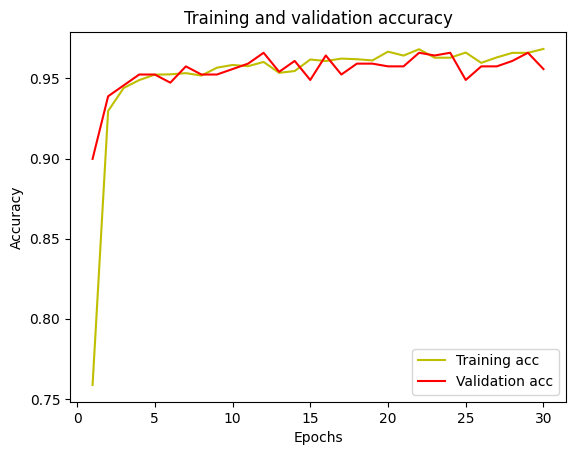

In [ ]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_249
Received: inputs=('Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))')
  warnings.warn(msg)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[484   1  11   0   0   0]
 [ 14 431  26   0   0   0]
 [  3   2 415   0   0   0]
 [  0  23   0 404  62   2]
 [  2   7   0  90 433   0]
 [  0  27   0   0   0 510]]
0.9083814048184594
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       496
           1       0.88      0.92      0.90       471
           2       0.92      0.99      0.95       420
           3       0.82      0.82      0.82       491
           4       0.87      0.81      0.84       532
           5       1.00      0.95      0.97       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



<Axes: >

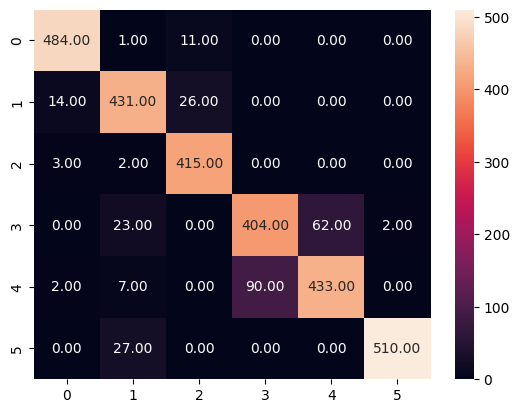

In [ ]:
pred=cnn_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

## LSTM

In [ ]:
lstm_model = Sequential()


lstm_model.add(Input(shape=(n_timesteps, n_features)))


lstm_model.add(LSTM(64, return_sequences=True))

lstm_model.add(LSTM(128))

lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(n_outputs, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 128, 64)        │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,266 (512.76 KB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_history=lstm_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_286
Received: inputs=('Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))')
  warnings.warn(msg)


166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4806 - loss: 1.2823 - val_accuracy: 0.7250 - val_loss: 0.6692
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6952 - loss: 0.6865 - val_accuracy: 0.6384 - val_loss: 0.7599
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7740 - loss: 0.5548 - val_accuracy: 0.8200 - val_loss: 0.4379
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8592 - loss: 0.4005 - val_accuracy: 0.9015 - val_loss: 0.3105
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9075 - loss: 0.2937 - val_accuracy: 0.9491 - val_loss: 0.1465
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9339 - loss: 0.1852 - val_accuracy: 0.9508 - val_loss: 0.1437
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9189 - loss: 0.2575 - val_accuracy: 0.9355 - val_loss: 0.1304
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9402 - loss: 0.1593 - val_accuracy: 0.938

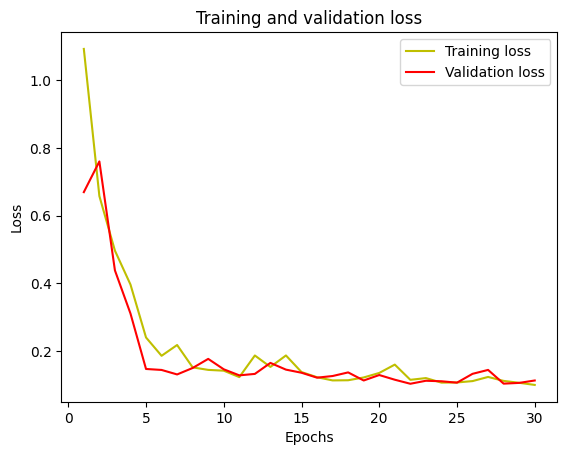

In [ ]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

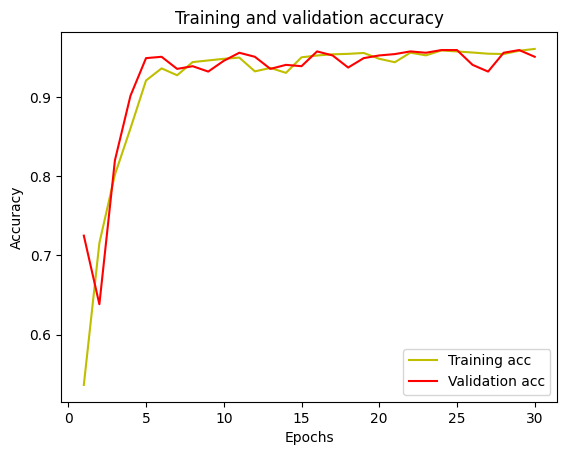

In [ ]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 1/93 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_286
Received: inputs=('Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))')
  warnings.warn(msg)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[446   4  46   0   0   0]
 [  5 460   6   0   0   0]
 [  0   3 417   0   0   0]
 [  1   1   0 417  65   7]
 [  0   2   0 117 413   0]
 [  0   0   0   0   0 537]]
0.9127926705123854
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       496
           1       0.98      0.98      0.98       471
           2       0.89      0.99      0.94       420
           3       0.78      0.85      0.81       491
           4       0.86      0.78      0.82       532
           5       0.99      1.00      0.99       537

    accuracy                           0.91      2947
   macro avg       0.91      0.92      0.91      2947
weighted avg       0.92      0.91      0.91      2947



<Axes: >

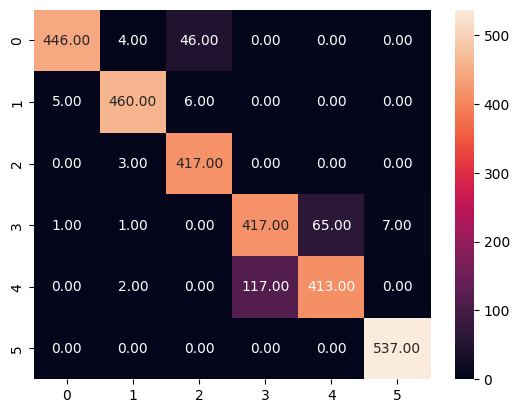

In [ ]:
pred=lstm_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

## GRU

In [ ]:
gru_model = Sequential()


gru_model.add(Input(shape=(n_timesteps, n_features)))

gru_model.add(GRU(64, return_sequences=True))

gru_model.add(GRU(128))

gru_model.add(Dense(100, activation='relu'))
gru_model.add(Dropout(0.5))

gru_model.add(Dense(n_outputs, activation='softmax'))

gru_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

gru_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,402 (400.01 KB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_history=gru_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_122
Received: inputs=('Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))')
  warnings.warn(msg)


166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4563 - loss: 1.3008 - val_accuracy: 0.6757 - val_loss: 0.6763
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7187 - loss: 0.6573 - val_accuracy: 0.8862 - val_loss: 0.3476
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8833 - loss: 0.3347 - val_accuracy: 0.9270 - val_loss: 0.1663
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9262 - loss: 0.2163 - val_accuracy: 0.9610 - val_loss: 0.1256
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9442 - loss: 0.1544 - val_accuracy: 0.9389 - val_loss: 0.1386
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9385 - loss: 0.1492 - val_accuracy: 0.9559 - val_loss: 0.1249
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9454 - loss: 0.1435 - val_accuracy: 0.9508 - val_loss: 0.1098
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9386 - loss: 0.1568 - val_accuracy: 0.944

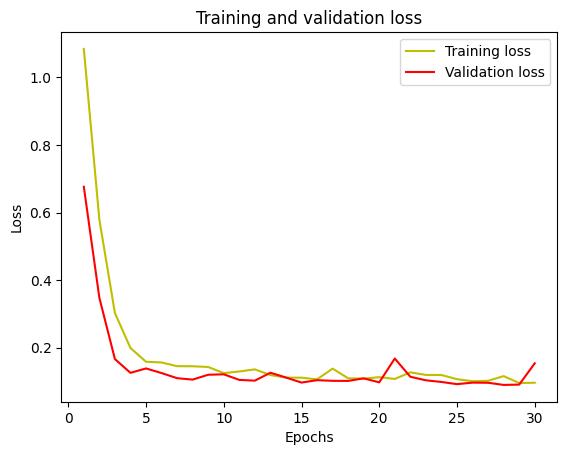

In [ ]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

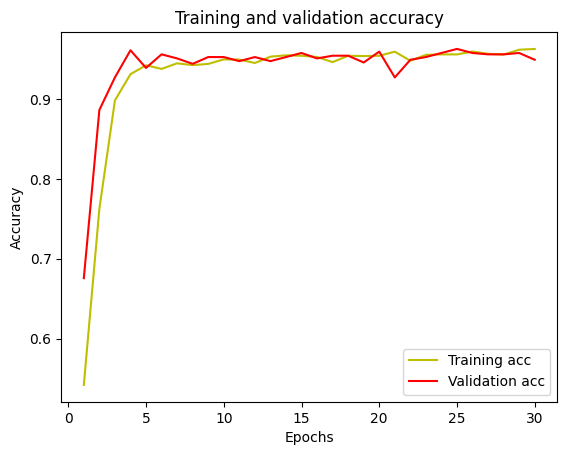

In [ ]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 1/93 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_122
Received: inputs=('Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))')
  warnings.warn(msg)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[478   2  16   0   0   0]
 [ 72 333  15   0  51   0]
 [ 10   6 404   0   0   0]
 [  0   1   0 323 165   2]
 [  0   0   0  18 514   0]
 [  0   0   0   0   0 537]]
0.8785205293518833
              precision    recall  f1-score   support

           0       0.85      0.96      0.91       496
           1       0.97      0.71      0.82       471
           2       0.93      0.96      0.95       420
           3       0.95      0.66      0.78       491
           4       0.70      0.97      0.81       532
           5       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.90      0.88      0.88      2947
weighted avg       0.90      0.88      0.88      2947



/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_122
Received: inputs=('Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))')
  warnings.warn(msg)


<Axes: >

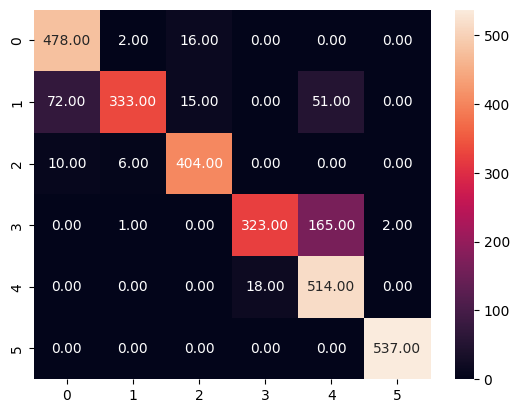

In [ ]:
pred=gru_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

## CNN + LSTM

In [ ]:
cnn_lstm_model = Sequential()

cnn_lstm_model.add(Input(shape=(n_timesteps, n_features)))

cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Activation('relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))

cnn_lstm_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Activation('relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))

cnn_lstm_model.add(LSTM(128))

cnn_lstm_model.add(Dense(100, activation='relu'))
cnn_lstm_model.add(Dropout(0.5))

cnn_lstm_model.add(Dense(n_outputs, activation='softmax'))

cnn_lstm_model.compile(loss='categorical_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

cnn_lstm_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 126, 64)        │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 126, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 59, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 59, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 59, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 29, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,738 (737.26 KB)

 Trainable params: 188,354 (735.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
model_history=cnn_lstm_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_302
Received: inputs=('Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))')
  warnings.warn(msg)


166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7603 - loss: 0.7026 - val_accuracy: 0.5620 - val_loss: 1.2533
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9374 - loss: 0.1653 - val_accuracy: 0.8998 - val_loss: 0.2184
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9482 - loss: 0.1341 - val_accuracy: 0.9525 - val_loss: 0.1037
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9492 - loss: 0.1228 - val_accuracy: 0.9168 - val_loss: 0.2489
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9473 - loss: 0.1352 - val_accuracy: 0.9253 - val_loss: 0.1421
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9493 - loss: 0.1242 - val_accuracy: 0.9372 - val_loss: 0.1134
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9467 - loss: 0.1351 - val_accuracy: 0.9525 - val_loss: 0.1123
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9546 - loss: 0.1042 - val_accuracy: 0.961

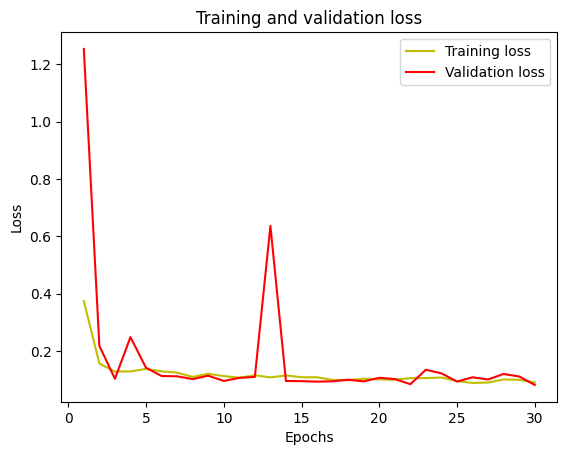

In [ ]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

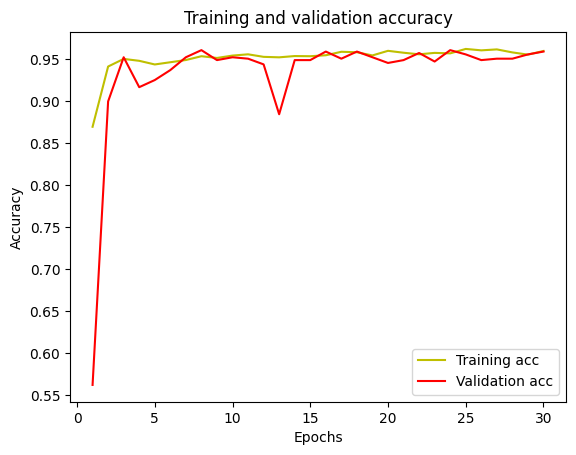

In [ ]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

18/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_302
Received: inputs=('Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))')
  warnings.warn(msg)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[466   4  26   0   0   0]
 [  3 450  15   3   0   0]
 [  0   0 420   0   0   0]
 [  0   3   0 401  86   1]
 [  0   0   0 105 427   0]
 [  0   0   0   0   0 537]]
0.9165252799457075
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       496
           1       0.98      0.96      0.97       471
           2       0.91      1.00      0.95       420
           3       0.79      0.82      0.80       491
           4       0.83      0.80      0.82       532
           5       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



<Axes: >

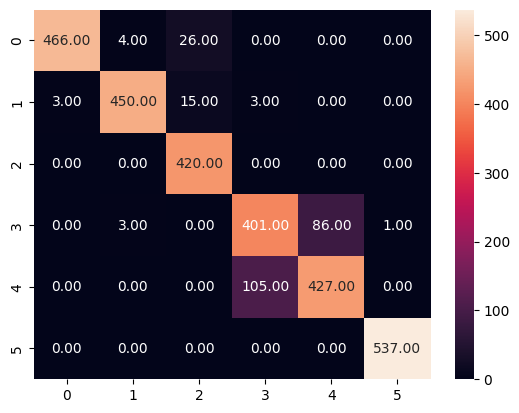

In [ ]:
pred=cnn_lstm_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

## CNN + GRU

In [ ]:
cnn_gru_model = Sequential()

cnn_gru_model.add(Input(shape=(n_timesteps, n_features)))

cnn_gru_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_gru_model.add(MaxPooling1D(pool_size=2))

cnn_gru_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_gru_model.add(MaxPooling1D(pool_size=2))

cnn_gru_model.add(GRU(128))

cnn_gru_model.add(Dense(100, activation='relu'))
cnn_gru_model.add(Dropout(0.5))

cnn_gru_model.add(Dense(n_outputs, activation='softmax'))

cnn_gru_model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

cnn_gru_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 126, 64)        │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,074 (543.26 KB)

 Trainable params: 139,074 (543.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_history=cnn_gru_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_175
Received: inputs=('Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))')
  warnings.warn(msg)


166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5643 - loss: 1.0675 - val_accuracy: 0.8710 - val_loss: 0.2926
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8834 - loss: 0.3241 - val_accuracy: 0.9032 - val_loss: 0.2711
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9315 - loss: 0.1797 - val_accuracy: 0.9559 - val_loss: 0.1165
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9492 - loss: 0.1309 - val_accuracy: 0.9542 - val_loss: 0.1218
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9502 - loss: 0.1201 - val_accuracy: 0.9525 - val_loss: 0.1063
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9552 - loss: 0.1157 - val_accuracy: 0.9559 - val_loss: 0.1005
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9508 - loss: 0.1221 - val_accuracy: 0.9525 - val_loss: 0.1091
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9484 - loss: 0.1219 - val_accuracy: 0.9491 - v

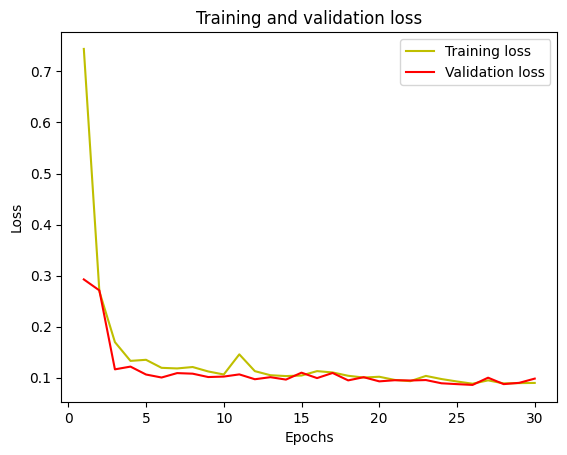

In [ ]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

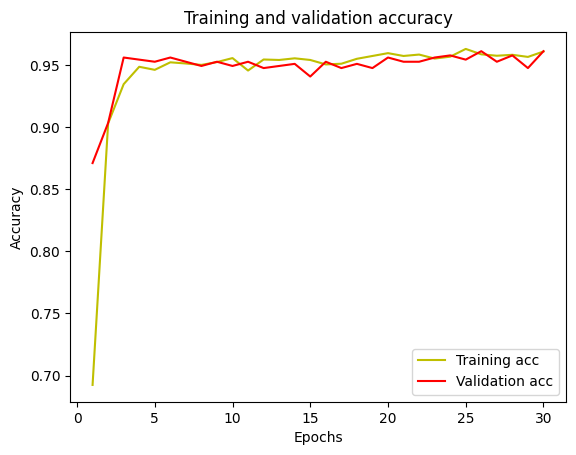

In [ ]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[[451  42   3   0   0   0]
 [  9 448  14   0   0   0]
 [  0   9 411   0   0   0]
 [  0   7   0 394  88   2]
 [  0   1   0  89 442   0]
 [  0  27   0   0   0 510]]
0.9012555140821175
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       496
           1       0.84      0.95      0.89       471
           2       0.96      0.98      0.97       420
           3       0.82      0.80      0.81       491
           4       0.83      0.83      0.83       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

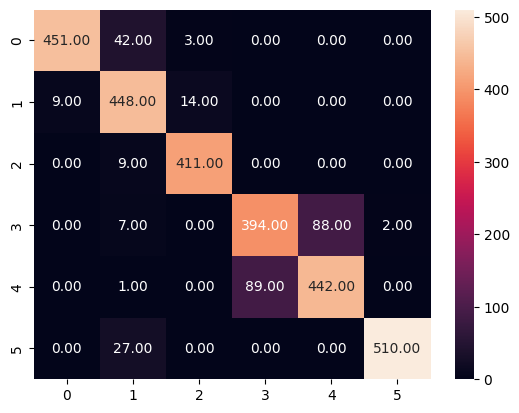

In [ ]:
pred=cnn_lstm_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')